データ読み込み、前処理

In [1]:
import os
import gc
import sys
import glob
import time
import tqdm
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency 

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# データの読み込み

In [3]:
input_path = r"C:\\shinji_work\\common_data\\Low_Birth_Weight_Infants\\"

In [4]:
df0 = pd.read_csv(input_path + "Low_Birth_Weight_Infants.csv" )
df0

,MotherID,Low,Age,LWT,Race,Smoker,PTL,Hypertension,UI,FTV,BWT
0,85,False,"Quantity[19, ""Years""]","Quantity[182, ""Pounds""]",2,False,0,False,True,0,"Quantity[2523, ""Grams""]"
1,86,False,"Quantity[33, ""Years""]","Quantity[155, ""Pounds""]",3,False,0,False,False,3,"Quantity[2551, ""Grams""]"
2,87,False,"Quantity[20, ""Years""]","Quantity[105, ""Pounds""]",1,True,0,False,False,1,"Quantity[2557, ""Grams""]"
3,88,False,"Quantity[21, ""Years""]","Quantity[108, ""Pounds""]",1,True,0,False,True,2,"Quantity[2594, ""Grams""]"
4,89,False,"Quantity[18, ""Years""]","Quantity[107, ""Pounds""]",1,True,0,False,True,0,"Quantity[2600, ""Grams""]"
5,91,False,"Quantity[21, ""Years""]","Quantity[124, ""Pounds""]",3,False,0,False,False,0,"Quantity[2622, ""Grams""]"
6,92,False,"Quantity[22, ""Years""]","Quantity[118, ""Pounds""]",1,False,0,False,False,1,"Quantity[2637, ""Grams""]"
7,93,False,"Quantity[17, ""Years""]","Quantity[103, ""Pounds""]",3,False,0,False,False,1,"Quantity[2637, ""Grams""]"
8,94,False,"Quantity[29, ""Years""]","Quantity[123, ""Pounds""]",1,True,0,False,False,1,"Quantity[2663, ""Grams""]"
9,95,False,"Quantity[26, ""Years""]","Quantity[113, ""Pounds""]",1,True,0,False,False,0,"Quantity[2665, ""Grams""]"


# データ前処理

In [5]:
# 必要な数値を取り出す、TrueとFalseを0,1に変換

df = df0[["MotherID"]].copy()
df.rename(columns={"MotherID":"ID"}, inplace=True)
df["low"] = df0["Low"]+0
df["age"] = df0["Age"].apply(lambda x:int(x[9:x.find(",")]))
df["lwt"] = df0["LWT"].apply(lambda x:int(x[9:x.find(",")]))
df["race"] = df0["Race"]
df["smoke"] = df0["Smoker"]+1
df["ptl"] = df0["PTL"]
df["ht"] = df0["Hypertension"]+0 #高血圧歴
df["ui"] = df0["UI"]+0

In [6]:
df

,ID,low,age,lwt,race,smoke,ptl,ht,ui
0,85,0,19,182,2,1,0,0,1
1,86,0,33,155,3,1,0,0,0
2,87,0,20,105,1,2,0,0,0
3,88,0,21,108,1,2,0,0,1
4,89,0,18,107,1,2,0,0,1
5,91,0,21,124,3,1,0,0,0
6,92,0,22,118,1,1,0,0,0
7,93,0,17,103,3,1,0,0,0
8,94,0,29,123,1,2,0,0,0
9,95,0,26,113,1,2,0,0,0


In [7]:
# 教科書と同じn=189のデータができたので、low.datとして保存
df.to_csv("./outputs/001/low.dat")

# データの簡単な確認

In [8]:
df["low"].value_counts()

0    130
1     59
Name: low, dtype: int64

<AxesSubplot:xlabel='low', ylabel='age'>

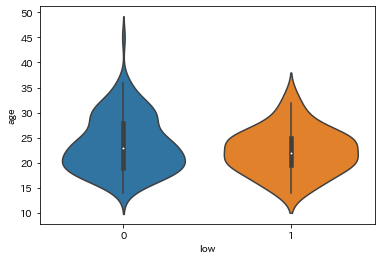

In [9]:
sns.violinplot(data=df, x="low", y="age")

<AxesSubplot:xlabel='low', ylabel='lwt'>

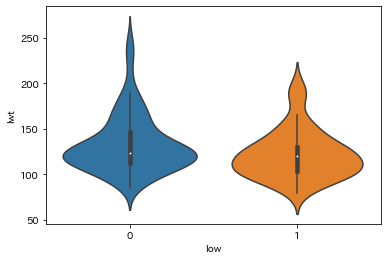

In [10]:
sns.violinplot(data=df, x="low", y="lwt")

In [11]:
def chi2_independence_test(data, x_var, y_var, correction=False):
    cont_table = pd.crosstab( data[x_var], data[y_var])
    chi2, p, dof, expected = chi2_contingency(cont_table, correction=False)
    
    return chi2, p, dof, cont_table, expected
    

In [12]:
def low_1_fraction(group_index):

    _frac = pd.DataFrame( df.groupby(group_index)["low"].value_counts(normalize=True) ).rename(columns={"low":"fraction"}).reset_index()
    display(_frac)
    
    plt.bar(_frac[group_index].unique().tolist(), height=_frac[_frac["low"]==1]["fraction"].values )
    plt.xlabel(group_index)
    plt.xticks(_frac[group_index].unique().tolist())
    plt.ylabel("低体重児の割合")
    plt.show()

In [13]:
chi2_independence_test(df, "low", "race", correction=False)

(5.004813010903259,
 0.08188769812479506,
 2,
 race   1   2   3
 low             
 0     73  15  42
 1     23  11  25,
 array([[66.03174603, 17.88359788, 46.08465608],
        [29.96825397,  8.11640212, 20.91534392]]))

,race,low,fraction
0,1,0,0.760417
1,1,1,0.239583
2,2,0,0.576923
3,2,1,0.423077
4,3,0,0.626866
5,3,1,0.373134


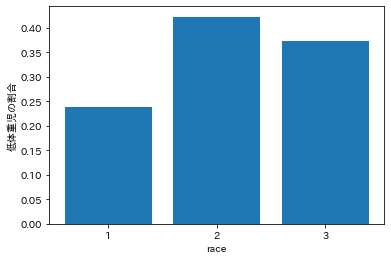

In [14]:
low_1_fraction("race")

In [15]:
chi2_independence_test(df, "low", "smoke", correction=False)

(4.923705434361292,
 0.026490642530502487,
 1,
 smoke   1   2
 low          
 0      86  44
 1      29  30,
 array([[79.1005291, 50.8994709],
        [35.8994709, 23.1005291]]))

,smoke,low,fraction
0,1,0,0.747826
1,1,1,0.252174
2,2,0,0.594595
3,2,1,0.405405


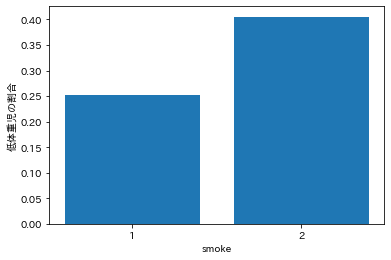

In [16]:
low_1_fraction("smoke")

<AxesSubplot:xlabel='low', ylabel='ptl'>

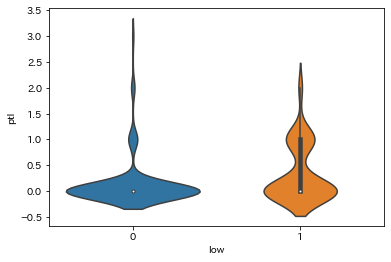

In [17]:
sns.violinplot(data=df, x="low", y="ptl")

In [18]:
chi2_independence_test(df, "low", "ht", correction=False)

(4.387954942213776,
 0.036193702173236975,
 1,
 ht     0  1
 low        
 0    125  5
 1     52  7,
 array([[121.74603175,   8.25396825],
        [ 55.25396825,   3.74603175]]))

,ht,low,fraction
0,0,0,0.706215
1,0,1,0.293785
2,1,1,0.583333
3,1,0,0.416667


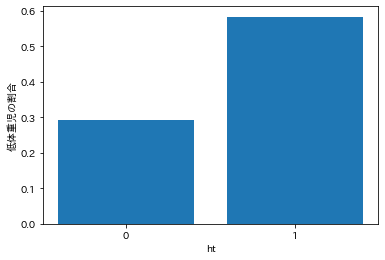

In [19]:
low_1_fraction("ht")

In [20]:
chi2_independence_test(df, "low", "ui", correction=False)

(5.400765262740207,
 0.020127924203651965,
 1,
 ui     0   1
 low         
 0    116  14
 1     45  14,
 array([[110.74074074,  19.25925926],
        [ 50.25925926,   8.74074074]]))

,ui,low,fraction
0,0,0,0.720497
1,0,1,0.279503
2,1,0,0.500000
3,1,1,0.500000


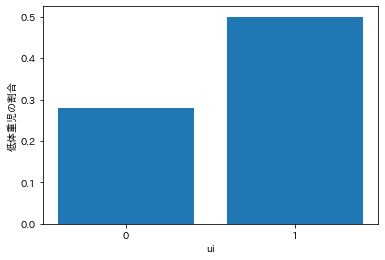

In [21]:
low_1_fraction("ui")

# 年齢と最終月経時体重を３分位で離散化

qcutで分割する方法もあるが、ここは教科書にそって分割する（qcutを使った前処理だとロジックが異なり、係数に差異が生じる）

In [22]:
lwt_d1 = df["lwt"].quantile(0.333)
lwt_d2 = df["lwt"].quantile(0.667)

print(lwt_d1, lwt_d2)

df["lwt_1"] = np.where( df["lwt"] < lwt_d1, 1, 0 )
df["lwt_2"] = np.where( (lwt_d1 <= df["lwt"]) & (df["lwt"] < lwt_d2), 1, 0 )
df["lwt_3"] = np.where( lwt_d2 <= df["lwt"], 1, 0)

df["lwt_c"] = np.where( df["lwt_1"]==1, 1, np.where(df["lwt_2"]==1, 2, 3 ) )

df[ ["lwt_1", "lwt_2", "lwt_3", "lwt_c"] ].drop_duplicates()

115.0 132.0


,lwt_1,lwt_2,lwt_3,lwt_c
0,0,0,1,3
2,1,0,0,1
5,0,1,0,2


In [23]:
age_d1 = df["age"].quantile(0.333, interpolation="midpoint")
age_d2 = df["age"].quantile(0.667, interpolation="midpoint")

print(age_d1, age_d2)

df["age_1"] = np.where( df["age"] < age_d1, 1, 0 )
df["age_2"] = np.where( (age_d1 <= df["age"]) & (df["age"] < age_d2), 1, 0 )
df["age_3"] = np.where( age_d2 <= df["age"], 1, 0)

df["age_c"] = np.where( df["age_1"]==1, 1, np.where(df["age_2"]==1, 2, 3 ) )

df[ ["age_1", "age_2", "age_3", "age_c"] ].drop_duplicates()

20.0 25.0


,age_1,age_2,age_3,age_c
0,1,0,0,1
1,0,0,1,3
2,0,1,0,2


In [24]:
print( df[df["lwt_1"]==1]["lwt"].median() )
print( df[df["lwt_2"]==1]["lwt"].median() )
print( df[df["lwt_3"]==1]["lwt"].median() )

104.0
120.5
155.0


In [25]:
#df["age_c"] = pd.qcut(df["age"],3,labels=[1,2,3])
#df["lwt_c"] = pd.qcut(df["lwt"],3,labels=[1,2,3])

In [26]:
df.columns.tolist()

['ID',
 'low',
 'age',
 'lwt',
 'race',
 'smoke',
 'ptl',
 'ht',
 'ui',
 'lwt_1',
 'lwt_2',
 'lwt_3',
 'lwt_c',
 'age_1',
 'age_2',
 'age_3',
 'age_c']

In [27]:
df[["lwt_1", "lwt_2"]].drop_duplicates()

,lwt_1,lwt_2
0,0,0
2,1,0
5,0,1


In [28]:
df["intercept"] = 1

In [29]:
df.to_csv("./outputs/001/low_preprocess.csv")

In [30]:
y = df["low"]

In [31]:
X = df[ ["intercept", "lwt_1", "lwt_2"] ]#.values
X

,intercept,lwt_1,lwt_2
0,1,0,0
1,1,0,0
2,1,1,0
3,1,1,0
4,1,1,0
5,1,0,1
6,1,0,1
7,1,1,0
8,1,0,1
9,1,1,0


In [32]:
import statsmodels.api as sm

# 粗オッズを求める

In [ ]:
logit = sm.GLM(y, X, family=sm.families.Binomial())
logit_result = logit.fit()

In [ ]:
print( logit_result.summary() )

# 年齢調整

In [ ]:
X = df[ ["intercept", "lwt_1", "lwt_2", "age_2", "age_3"] ]

In [ ]:
df[ ["lwt_1", "lwt_2", "age_2", "age_3"] ].drop_duplicates()

プロファイル数は9

In [ ]:
logit2 = sm.GLM(y, X, family=sm.families.Binomial())
logit_result2 = logit2.fit()

print(logit_result2.summary())

In [ ]:
df.columns

# 粗オッズモデルでデビアンスを求めてみる

In [ ]:
#df.groupby(["lwt_1", "lwt_2"])["low"].value_counts()
profile_count = pd.pivot_table(data=df, index=["lwt_1", "lwt_2"], columns="low", values="ID", aggfunc="count")
profile_count.reset_index(inplace=True)
profile_count = profile_count.rename(columns={0:"n-d", 1:"d"})
profile_count["n"] = profile_count["d"] + profile_count["n-d"]
profile_count

In [ ]:
X = df[ ["intercept", "lwt_1", "lwt_2"] ].drop_duplicates()
display(X)
y_pred = logit_result.predict(X)
y_pred

In [ ]:
X["pred"] = y_pred
X

In [ ]:
profile_count = profile_count.merge(X, on=["lwt_1", "lwt_2"], how="inner")

In [ ]:
profile_count

In [ ]:
Deviance_fit = 0
for i, row in profile_count.iterrows():
   #Deviance_fit += -2 *( row["d"]*np.log(row["n"]*row["pred"]) + row["n-d"]*np.log(row["n"]*(1-row["pred"]))  )
    Deviance_fit += -2 *( row["d"]*np.log(row["pred"]) + row["n-d"]*np.log((1-row["pred"]))  )
    
Deviance_fit

In [ ]:
Deviance_perfect = 0
for i, row in profile_count.iterrows():
    Deviance_perfect += -2 *( row["d"]*np.log(row["d"]/row["n"]) + row["n-d"]*np.log(row["n-d"]/row["n"])  )
    
Deviance_perfect

In [ ]:
Deviance_fit - Deviance_perfect

In [ ]:
_list_list = []

for _i in range(0,188):

    _list=[]
    for _j in range(0,189):
        if _j == _i:
            _list.append(1)
        else:
            _list.append(0)
            
    _list_list.append(_list)
#df_full = pd.DataFrame()
#df_full

In [ ]:
for _i in range(0,188):
    if _i==0:
        df_full = pd.DataFrame(_list_list[_i], columns=["var"+str(_i)])
    else:
        df_full["var"+str(_i)] = _list_list[_i]
        
df_full["intercept"] = 1
df_full

In [ ]:
X_full = df_full.values

In [ ]:
logit_full = sm.GLM(y, X_full, family=sm.families.Binomial())
logit_full_result = logit_full.fit()

print(logit_full_result.summary())

In [ ]:
from scipy.stats import chi2

In [ ]:
chi2.cdf(3.84,1)

In [ ]:
1-chi2.cdf(6.9849,2)